## Questions
### (1)When the crisis happened, did genteel actually worked?
### (2)Did the children receive more protection than other age groups?
### (3)Did the rich suivived more than the poor?

In [2]:
%pylab inline
import unicodecsv
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

Populating the interactive namespace from numpy and matplotlib


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Deal with missing values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df[['Survived','Age','SibSp','Parch','Fare']].describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
age_median = df.Age.median()
print (age_median)

df.Age.fillna(age_median,inplace=True)

df.Age.describe()

28.0


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Embarked missing values

In [13]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df.fillna({"Embarked":"S"},inplace=True)

df.Embarked.isnull().sum()

0

## Suivived rate 

In [16]:
total_survived = df['Survived'].sum()
total_no_survived = 891 - total_survived
total_survived_rate = total_survived / 891
print('total survived')
print (total_survived)
print("total suivived rate")
print(total_survived_rate)

total survived
342
total suivived rate
0.3838383838383838


Text(0.5,1,'Survival rate')

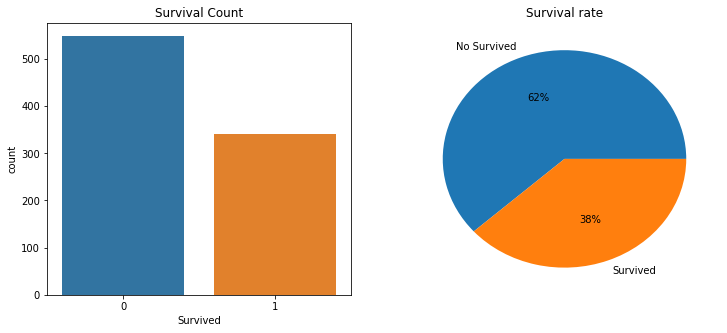

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x='Survived',data=df)
plt.title('Survival Count')

plt.subplot(122)
plt.pie([total_no_survived,total_survived],labels = ['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survival rate')
 
  

### UNIVRATE ANALYSIS

In [21]:
sex_survived = (df.groupby(['Sex']).sum())['Survived']
sex_total = df.groupby(['Sex']).count()['Survived']
sex_survived_rate = sex_survived / sex_total

print("total people for each sex")
print(sex_total)
print("surivival rate for each sex")
print(sex_survived_rate)

total people for each sex
Sex
female    314
male      577
Name: Survived, dtype: int64
surivival rate for each sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


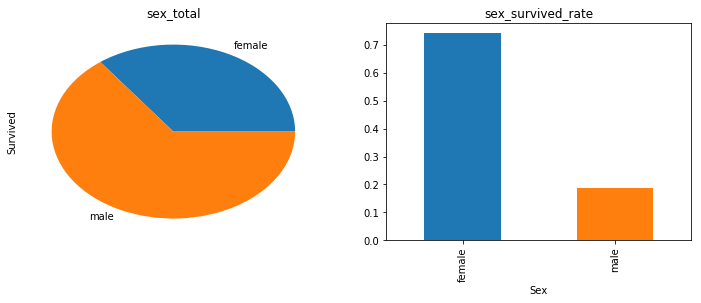

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sex_total.plot(kind='pie')
plt.title('sex_total')

plt.subplot(122)
sex_survived_rate.plot(kind='bar')
plt.title('sex_survived_rate')

plt.show()

### Probably genteel worked that man gave more chance for woman to live

In [25]:
Age_survived_rate  = (df.groupby(['Age']).sum()/df.groupby(['Age']).count())['Survived']

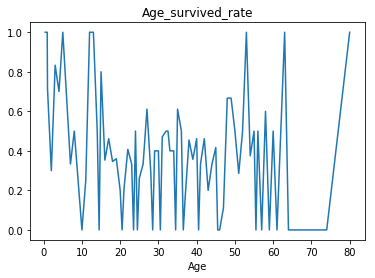

In [26]:
Age_survived_rate.plot()
plt.title('Age_survived_rate')
plt.show()

In [27]:
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
bins = np.arange(0,80,10)
age_cut = pd.cut(df['Age'],bins)
age_cut_grouped = df.groupby(age_cut)
age_cut_survived = age_cut_grouped.sum()['Survived']
age_cut_total = age_cut_grouped.count()['Survived']
age_Survival_Rate = age_cut_survived/age_cut_total

In [30]:
print("age group distribution")
print(age_cut_total)
print("age group survival rate")
print(age_Survival_Rate)

age group distribution
Age
(0, 10]      64
(10, 20]    115
(20, 30]    407
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
Name: Survived, dtype: int64
age group survival rate
Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
Name: Survived, dtype: float64


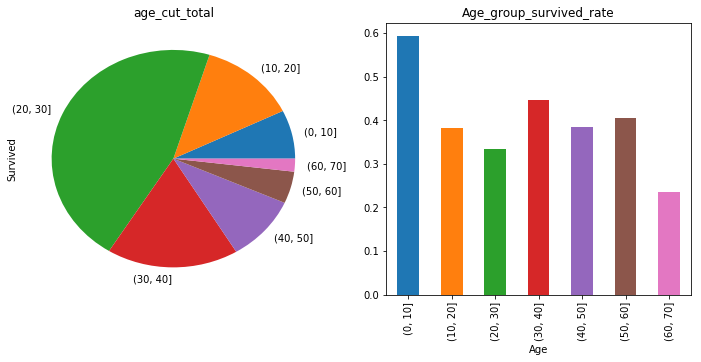

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(121)
age_cut_total.plot(kind='pie')
plt.title('age_cut_total')

plt.subplot(122)
age_Survival_Rate.plot(kind='bar')
plt.title('Age_group_survived_rate')

plt.show()

## children from 0-10 has larger survived rate than other age groups

In [34]:
pclass_survived = (df.groupby(['Pclass']).sum())['Survived']
pclass_total = (df.groupby(['Pclass']).count())['Survived']
pclass_survived_rate = pclass_survived/pclass_total
print("total people of each class")
print(pclass_total)
print("survival rate for each class")
print(pclass_survived_rate)

total people of each class
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
survival rate for each class
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


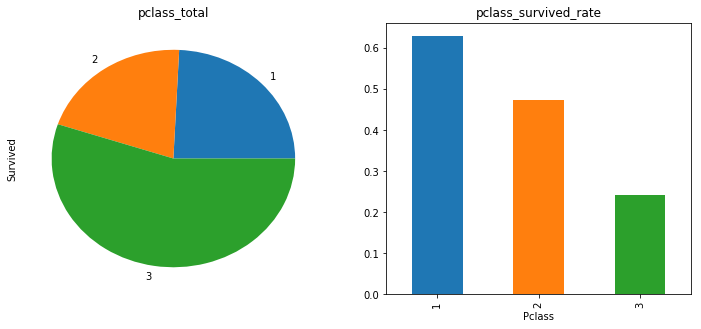

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(121)
pclass_total.plot(kind='pie')
plt.title('pclass_total')

plt.subplot(122)
pclass_survived_rate.plot(kind='bar')
plt.title('pclass_survived_rate')

plt.show()

## Multivariate analysis

In [39]:
Pclass_Sex_survived_rate = (df.groupby(['Pclass','Sex']).sum()
                            /df.groupby(['Pclass','Sex']).count())['Survived']

In [40]:
print("cabin class with sex survived rate")
print(Pclass_Sex_survived_rate)

cabin class with sex survived rate
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


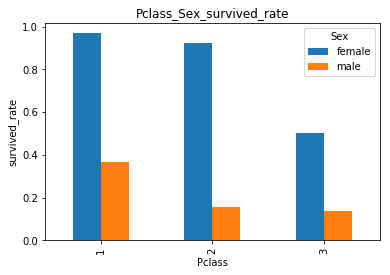

In [41]:
Pclass_Sex_survived_rate.unstack().plot(kind='bar')
plt.title("Pclass_Sex_survived_rate")
plt.ylabel('survived_rate')
plt.show()

In [42]:
bins = np.arange(0,80,10)
age_cut = pd.cut(df['Age'],bins)
Age_Sex_survived_rate = (df.groupby([age_cut,'Sex']).sum()
                        /df.groupby([age_cut,'Sex']).count())['Survived']

In [43]:
print("Age and Sex and survived rate")
print(Age_Sex_survived_rate)

Age and Sex and survived rate
Age       Sex   
(0, 10]   female    0.612903
          male      0.575758
(10, 20]  female    0.739130
          male      0.144928
(20, 30]  female    0.723881
          male      0.142857
(30, 40]  female    0.836364
          male      0.230000
(40, 50]  female    0.677419
          male      0.218182
(50, 60]  female    0.928571
          male      0.142857
(60, 70]  female    1.000000
          male      0.071429
Name: Survived, dtype: float64


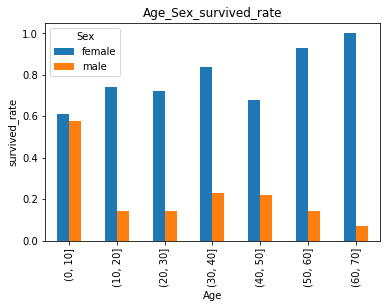

In [44]:
Age_Sex_survived_rate.unstack().plot(kind='bar')
plt.title('Age_Sex_survived_rate')
plt.ylabel("survived_rate")
plt.show()

In [45]:
bins = np.arange(0,80,10)
age_cut = pd.cut(df['Age'],bins)
Age_Pclass_survived_rate = (df.groupby([age_cut,'Pclass']).sum()
/df.groupby([age_cut,'Pclass']).count())['Survived']

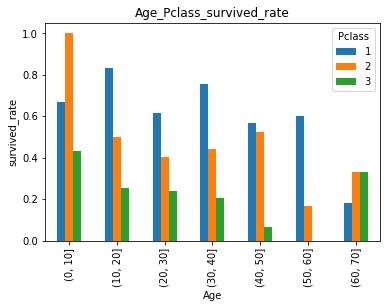

In [47]:
Age_Pclass_survived_rate.unstack().plot(kind='bar')
plt.title('Age_Pclass_survived_rate')
plt.ylabel("survived_rate")
plt.show()

In [48]:
print("cabin class and sex and survived rate")
df.groupby([age_cut,'Pclass'])['Survived'].count()

cabin class and sex and survived rate


Age       Pclass
(0, 10]   1           3
          2          17
          3          44
(10, 20]  1          18
          2          18
          3          79
(20, 30]  1          70
          2          72
          3         265
(30, 40]  1          49
          2          43
          3          63
(40, 50]  1          37
          2          19
          3          30
(50, 60]  1          25
          2          12
          3           5
(60, 70]  1          11
          2           3
          3           3
Name: Survived, dtype: int64

## Answers to the questions

## (1):Female had survived rate of 74%,male had 19%, definitely genteel worked

## (2):Children has 59% survived rate, obviously higher than other age groups

## (3):The rich did survived more than the poor according to the class of the cabin. But Female and Children still get more survived rate in each of the class